In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import glob

In [ ]:
img1=cv2.imread('/content/drive/MyDrive/PCB dataset/1/temp/00041003_temp.jpg')
img2=cv2.imread('/content/drive/MyDrive/PCB dataset/1/train/00041003_test.jpg')

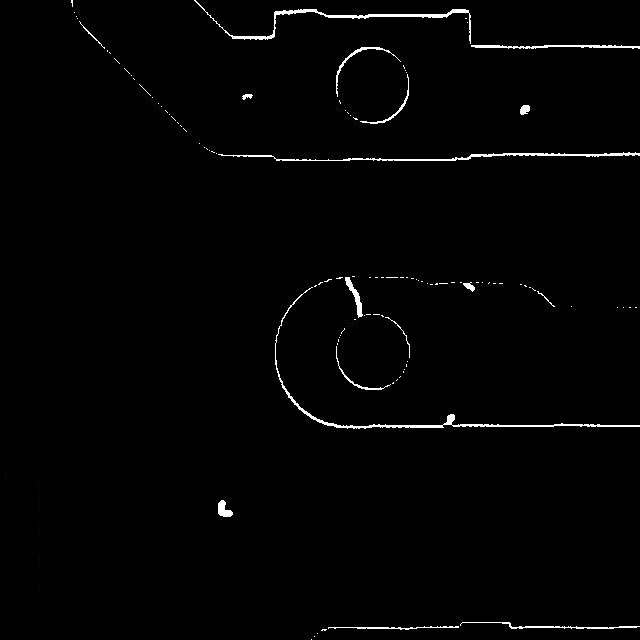

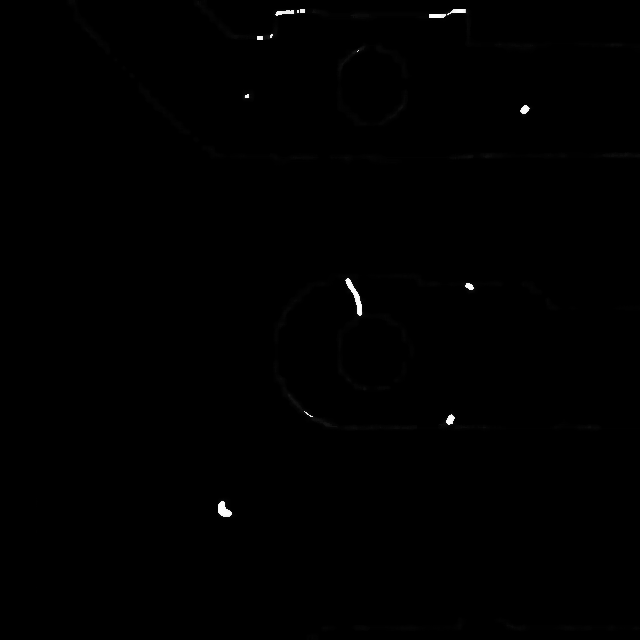

In [ ]:
bitwise_xor = cv2.bitwise_xor(img2, img1)
cv2_imshow( bitwise_xor)
new_image = cv2.medianBlur(bitwise_xor, 7)
cv2_imshow(new_image)

In [ ]:
for filename in glob.glob('/content/drive/MyDrive/PCB dataset/1/temp/*.jpg'):
  root_img_name = filename.replace('_temp.jpg', '')
  train_name= root_img_name + '_test.jpg'
  image1 = cv2.imread(filename,0)
  image2 = cv2.imread(train_name,0)

# compute difference
  difference = cv2.subtract(image1, image2)

# color the mask red
  Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
  ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)
  difference[mask != 255] = [0, 0, 255]
  cv2.imwrite(root_img_name +'diff.jpg', difference)


In [ ]:
for filename in glob.glob('/content/drive/MyDrive/PCB dataset/1/temp/*.jpg'):
 
  root_img_name=filename.replace('temp/','train/')
  train_name = root_img_name.replace('_temp.jpg', '')
  train_name= train_name + '_test.jpg'
  dest_name= filename.replace('temp/','mask/')
  dest_name=dest_name.replace('_temp.jpg','_mask.jpg')
  image1 = cv2.imread(filename,0)
  image2 = cv2.imread(train_name,0)
  bitwise_xor = cv2.bitwise_xor(image1, image2)
  new_image = cv2.medianBlur(bitwise_xor, 7)

  
  cv2.imwrite(dest_name, new_image)